In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

In [3]:
cmr_females = pd.read_csv('../results/ALL_CMR_FEMALES_Y.csv')
cmr_males = pd.read_csv('../results/ALL_CMR_MALES_Y.csv')

In [4]:
cmr_females_2019 = cmr_females.query('year == 2019')
cmr_males_2019 = cmr_males.query('year == 2019')

In [36]:
cmr_females_2019

,name_normalized_tot,powiat_numer,year,age_group,population,deaths,CMR
19,bocheński,1201,2019,TOTAL,54023,422,781.148770
41,krakowski,1206,2019,TOTAL,142608,1187,832.351621
63,miechowski,1208,2019,TOTAL,24776,316,1275.427833
85,myślenicki,1209,2019,TOTAL,64374,536,832.634293
107,proszowicki,1214,2019,TOTAL,21935,221,1007.522225
...,...,...,...,...,...,...,...
155359,żywiecki,2417,2019,Y70-74,3558,83,2332.771220
155360,żywiecki,2417,2019,Y75-79,2474,76,3071.948262
155361,żywiecki,2417,2019,Y80-84,2280,165,7236.842105
155362,żywiecki,2417,2019,Y_GE85,4510,321,7117.516630


In [5]:
females_2019_copy = cmr_females_2019.copy()
males_2019_copy = cmr_males_2019.copy()

In [7]:
males_2019_copy.drop(['name_normalized_tot', 'year', 'population', 'deaths'], axis=1, inplace=True)

In [24]:
females_2019_copy

,powiat_numer,age_group,CMR
19,1201,TOTAL,781.148770
41,1206,TOTAL,832.351621
63,1208,TOTAL,1275.427833
85,1209,TOTAL,832.634293
107,1214,TOTAL,1007.522225
...,...,...,...
155359,2417,Y70-74,2332.771220
155360,2417,Y75-79,3071.948262
155361,2417,Y80-84,7236.842105
155362,2417,Y_GE85,7117.516630


In [8]:
females_2019_age = females_2019_copy.query('age_group != "TOTAL"')
males_2019_age = males_2019_copy.query('age_group != "TOTAL"')

In [9]:
females_2019_age

,powiat_numer,age_group,CMR
8670,661,Y10-14,0.000000
8671,661,Y15-19,0.000000
8672,661,Y20-24,0.000000
8673,661,Y25-29,0.000000
8674,661,Y30-34,46.750818
...,...,...,...
155359,2417,Y70-74,2332.771220
155360,2417,Y75-79,3071.948262
155361,2417,Y80-84,7236.842105
155362,2417,Y_GE85,7117.516630


In [71]:
females_pivot = females_2019_age.pivot(index='powiat_numer', columns='age_group', values='CMR')

In [11]:
males_pivot = males_2019_age.pivot(index='powiat_numer', columns='age_group', values='CMR')

In [72]:
females_pivot

age_group,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y80-84,Y_GE85,Y_LT5
powiat_numer,,,,,,,,,,,,,,,,,,
201,0.000000,0.000000,0.000000,0.000000,29.533373,83.728719,28.019053,230.946882,0.000000,234.649980,530.679934,1016.762847,1278.240190,2018.842530,3061.224490,6012.176560,6618.819777,95.969290
202,43.271311,0.000000,0.000000,33.244681,0.000000,0.000000,104.248111,298.864316,0.000000,303.132368,845.070423,730.088496,1453.287197,1366.982124,3097.345133,6358.974359,6573.802542,48.995590
203,39.761431,0.000000,86.244071,77.549438,64.998375,107.526882,104.438642,67.613252,0.000000,381.841324,321.313816,970.110121,1422.175402,1864.975755,3415.883860,5147.759771,8353.080569,52.246604
204,0.000000,0.000000,0.000000,80.710250,0.000000,0.000000,80.840744,276.497696,0.000000,0.000000,864.304235,974.512744,1256.281407,2308.626974,4040.404040,5111.111111,7305.502846,268.096515
205,0.000000,0.000000,0.000000,66.445183,55.248619,48.169557,106.044539,63.734863,0.000000,402.955003,870.574579,720.396218,1443.298969,2288.329519,3120.356612,7153.284672,7440.476190,287.907869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,69.979006,157.853197,66.622252,108.283703,55.928412,235.960359,146.771037,114.481969,80.450523,393.184797,546.149645,1061.865189,1581.027668,1845.280341,4111.405836,6163.328197,8370.702541,255.536627
3218,0.000000,0.000000,0.000000,0.000000,0.000000,72.516316,154.679041,266.903915,0.000000,606.060606,571.895425,519.480519,1563.663440,1513.387660,3486.238532,5827.067669,6533.101045,375.000000
3261,0.000000,246.913580,84.925690,0.000000,49.043649,104.602510,45.495905,86.880973,0.000000,552.868003,501.770956,652.906487,1346.114624,1447.296559,2205.513784,4946.455890,5391.394505,40.966817


Clustering

In [73]:
females_pivot.values

array([[   0.        ,    0.        ,    0.        , ..., 6012.17656012,
        6618.81977671,   95.96928983],
       [  43.27131112,    0.        ,    0.        , ..., 6358.97435897,
        6573.80254154,   48.9955904 ],
       [  39.76143141,    0.        ,   86.24407072, ..., 5147.75977121,
        8353.08056872,   52.24660397],
       ...,
       [   0.        ,  246.91358025,   84.92569002, ..., 4946.45588985,
        5391.39450492,   40.96681688],
       [  11.05094486,    0.        ,   43.45936549, ..., 5084.02767971,
        6661.30545503,   54.70459519],
       [   0.        ,  134.04825737,  110.98779134, ..., 7471.26436782,
        6454.72061657,    0.        ]])

/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code

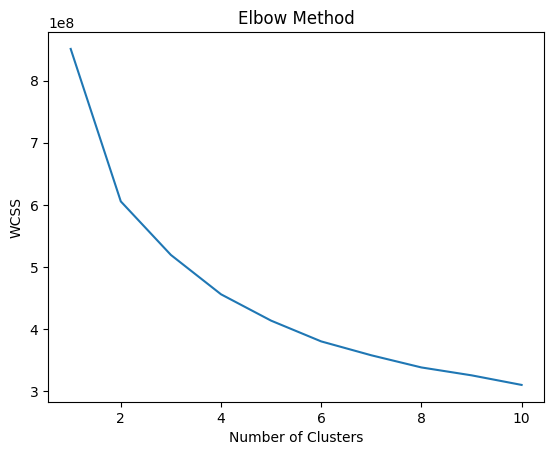

age_group        Y10-14      Y15-19      Y20-24      Y25-29      Y30-34   
powiat_numer                                                              
201            0.000000    0.000000    0.000000    0.000000   29.533373  \
202           43.271311    0.000000    0.000000   33.244681    0.000000   
203           39.761431    0.000000   86.244071   77.549438   64.998375   
204            0.000000    0.000000    0.000000   80.710250    0.000000   
205            0.000000    0.000000    0.000000   66.445183   55.248619   
...                 ...         ...         ...         ...         ...   
3217          69.979006  157.853197   66.622252  108.283703   55.928412   
3218           0.000000    0.000000    0.000000    0.000000    0.000000   
3261           0.000000  246.913580   84.925690    0.000000   49.043649   
3262          11.050945    0.000000   43.459365   56.893609   52.680100   
3263           0.000000  134.048257  110.987791  171.086399  143.884892   

age_group         Y35-39

/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Prepare the data for clustering
females_pivot = females_pivot.fillna(0)  # Replace NaN values with 0
clustering_data = females_pivot.values

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering (assuming 3 clusters based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(clustering_data)
cluster_labels = kmeans.labels_

# Assign the cluster labels to the original dataframe
females_pivot['Cluster'] = cluster_labels
print(females_pivot)


range(0, 3)

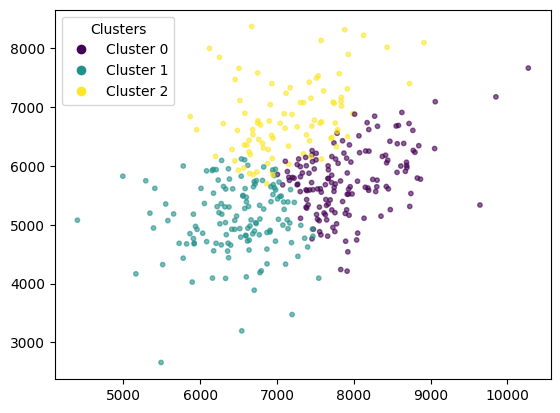

In [25]:
scatter = plt.scatter(females_pivot.Y_GE85, females_pivot['Y80-84'], c=females_pivot.Cluster, alpha = 0.6, s=10)
cluster_numbers = range(kmeans.n_clusters)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                          markerfacecolor=c, markersize=8) for i, c in zip(cluster_numbers, scatter.cmap(scatter.norm(cluster_numbers)))]
plt.legend(handles=legend_elements, title='Clusters')
plt.show()


In [34]:
females_pivot['powiat_numer'] = females_pivot.index

In [38]:
females_pivot = females_pivot.reset_index(drop=True)

In [43]:
cmr_females_2019[['powiat_numer', 'name_normalized_tot']].drop_duplicates()

,powiat_numer,name_normalized_tot
19,1201,bocheński
41,1206,krakowski
63,1208,miechowski
85,1209,myślenicki
107,1214,proszowicki
...,...,...
8245,1433,węgrowski
8267,1464,Siedlce
8289,1406,grójecki
8311,1428,sochaczewski


In [45]:
clusters_check_df = pd.merge(females_pivot[['Y80-84', 'Y_GE85', 'Cluster', 'powiat_numer']], cmr_females_2019[['powiat_numer', 'name_normalized_tot']].drop_duplicates(), on=['powiat_numer'], how='inner')


In [47]:
clusters_check_df.query("Cluster == 1")

,Y80-84,Y_GE85,Cluster,powiat_numer,name_normalized_tot
0,6012.176560,6618.819777,1,201,bolesławiecki
10,5761.316872,6233.877902,1,211,lubiński
13,5612.244898,6422.351234,1,214,oleśnicki
21,5945.945946,6978.319783,1,222,wołowski
26,5490.438001,6554.878049,1,261,Jelenia Góra
...,...,...,...,...,...
363,4922.644163,5958.230958,1,3205,gryficki
365,4830.917874,6769.230769,1,3207,kamieński
376,5827.067669,6533.101045,1,3218,łobeski
377,4946.455890,5391.394505,1,3261,Koszalin


In [53]:
clusters_check_df.query("name_normalized_tot == 'bielski'")

,Y80-84,Y_GE85,Cluster,powiat_numer,name_normalized_tot
218,5258.620690,8474.576271,0,2003,bielski
254,5606.198724,7931.377424,0,2402,bielski


In [56]:
clusters_check_df.query("Cluster == 1").to_clipboard()

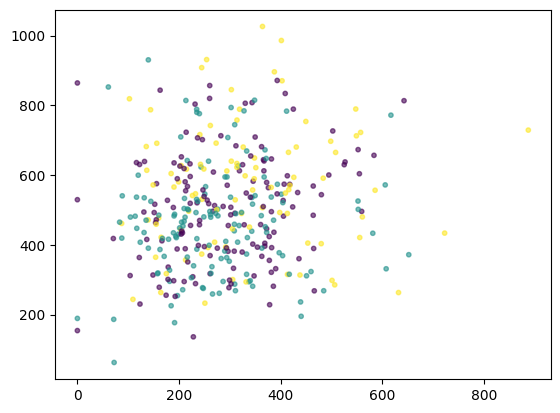

In [59]:
plt.scatter(females_pivot['Y50-54'], females_pivot['Y55-59'], c=females_pivot.Cluster, alpha = 0.6, s=10)
plt.show()

In [67]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(females_pivot['Cluster'])

centroids

array([[8.78914122e+00, 2.43547017e+01, 2.57112294e+01, 2.60182491e+01,
        3.66765286e+01, 6.24111916e+01, 1.07443487e+02, 1.86842614e+02,
        1.40938318e+01, 2.93253221e+02, 5.05641496e+02, 8.13778632e+02,
        1.25546921e+03, 1.81080353e+03, 3.31210131e+03, 5.76904323e+03,
        7.93259746e+03, 8.41861818e+01],
       [8.89197126e+00, 1.77101523e+01, 2.37172699e+01, 2.80249916e+01,
        3.83616872e+01, 5.72960953e+01, 9.38198861e+01, 1.61805637e+02,
        7.58730241e+00, 2.73863654e+02, 4.63878724e+02, 7.80204230e+02,
        1.17764572e+03, 1.73427641e+03, 3.06872428e+03, 5.09503840e+03,
        6.49265966e+03, 8.80020188e+01],
       [8.76249110e+00, 2.29614176e+01, 2.07763082e+01, 3.02237844e+01,
        4.56797046e+01, 6.88973280e+01, 1.12206295e+02, 1.92508085e+02,
        9.11457758e+00, 3.28752225e+02, 5.65786762e+02, 8.62635011e+02,
        1.35142846e+03, 1.99152733e+03, 3.54961203e+03, 6.80419288e+03,
        7.14599574e+03, 8.30388020e+01]])

In [69]:
cluster_labels

array([1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1,
       1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0,

In [68]:
#Getting unique labels
 
u_labels = np.unique(cluster_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(females_pivot[cluster_labels == i , 0] , females_pivot[cluster_labels == i , 1] , label = i)
plt.legend()
plt.show()

InvalidIndexError: (array([False, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False]), 0)

PCA transform

In [62]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data)

In [67]:
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels
pca_df.index = females_pivot.powiat_numer

In [70]:
clusters_check_df

,Y80-84,Y_GE85,Cluster,powiat_numer,name_normalized_tot
0,6012.176560,6618.819777,1,201,bolesławiecki
1,6358.974359,6573.802542,2,202,dzierżoniowski
2,5147.759771,8353.080569,0,203,głogowski
3,5111.111111,7305.502846,0,204,górowski
4,7153.284672,7440.476190,2,205,jaworski
...,...,...,...,...,...
375,6163.328197,8370.702541,0,3217,wałecki
376,5827.067669,6533.101045,1,3218,łobeski
377,4946.455890,5391.394505,1,3261,Koszalin
378,5084.027680,6661.305455,1,3262,Szczecin


In [68]:
pca_df

,PCA1,PCA2,Cluster
powiat_numer,,,
201,205.564609,-554.935672,1
202,8.102700,-715.256845,2
203,-294.461195,1148.262925,0
204,211.053718,113.304907,0
205,-1201.058725,-589.704335,2
...,...,...,...
3217,-1231.739970,383.431078,0
3218,337.142091,-601.785567,1
3261,1997.735463,-596.732936,1


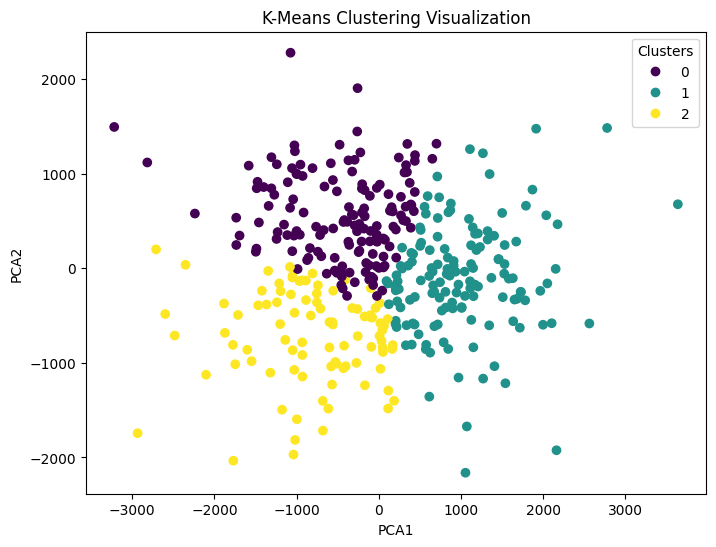

In [69]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Visualization')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

PCA and k-means Clustering

In [93]:
from sklearn.discriminant_analysis import StandardScaler

clustering_data = females_pivot.values
scaler = StandardScaler()
scaler.fit(clustering_data)
clustering_data=scaler.transform(clustering_data)

In [97]:
females_pivot.values

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  1.40253006e+03,  3.44413226e+02],
       [ 4.32713111e+01,  0.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  1.20675275e+03, -1.91987750e+02],
       [ 3.97614314e+01,  0.00000000e+00,  8.62440707e+01, ...,
         0.00000000e+00,  3.11787564e+02,  1.01410328e+03],
       ...,
       [ 0.00000000e+00,  2.46913580e+02,  8.49256900e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.10509449e+01,  0.00000000e+00,  4.34593655e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.34048257e+02,  1.10987791e+02, ...,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [94]:
clustering_data

array([[-0.44871907, -0.53531462, -0.66166414, ...,  0.07014864,
         0.81947341,  0.44913605],
       [ 1.75248835, -0.53531462, -0.66166414, ...,  1.33950496,
         0.59735461, -0.38379814],
       [ 1.57394111, -0.53531462,  1.73705853, ..., -1.19920768,
        -0.41802661,  1.4890442 ],
       ...,
       [-0.44871907,  5.59657859,  1.70039016, ...,  0.07014864,
                nan,         nan],
       [ 0.11344143, -0.53531462,  0.54707942, ...,  0.07014864,
                nan,         nan],
       [-0.44871907,  2.79366226,  2.42526032, ...,  1.33950496,
                nan,         nan]])

In [98]:
# Prepare the data for clustering
clustering_data = np.nan_to_num(clustering_data)  # Replace NaN values with 0

pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data)
# pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Determine the optimal number of clusters using the elbow method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     kmeans.fit(clustering_data)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# Perform k-means clustering (assuming 3 clusters based on the elbow method)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(pca_components)
cluster_labels = kmeans_pca.labels_

# Assign the cluster labels to the original dataframe
females_pivot['Cluster'] = cluster_labels
print(females_pivot)

/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


age_group        Y10-14      Y15-19      Y20-24      Y25-29      Y30-34   
powiat_numer                                                              
201            0.000000    0.000000    0.000000    0.000000   29.533373  \
202           43.271311    0.000000    0.000000   33.244681    0.000000   
203           39.761431    0.000000   86.244071   77.549438   64.998375   
204            0.000000    0.000000    0.000000   80.710250    0.000000   
205            0.000000    0.000000    0.000000   66.445183   55.248619   
...                 ...         ...         ...         ...         ...   
3217          69.979006  157.853197   66.622252  108.283703   55.928412   
3218           0.000000    0.000000    0.000000    0.000000    0.000000   
3261           0.000000  246.913580   84.925690    0.000000   49.043649   
3262          11.050945    0.000000   43.459365   56.893609   52.680100   
3263           0.000000  134.048257  110.987791  171.086399  143.884892   

age_group         Y35-39

In [99]:
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

In [100]:
females_pivot['PCA1'] = pca_df.PCA1
females_pivot['PCA2'] = pca_df.PCA2

In [101]:
pca_df['Cluster'] = cluster_labels

In [102]:
pca_df.index = females_pivot.index

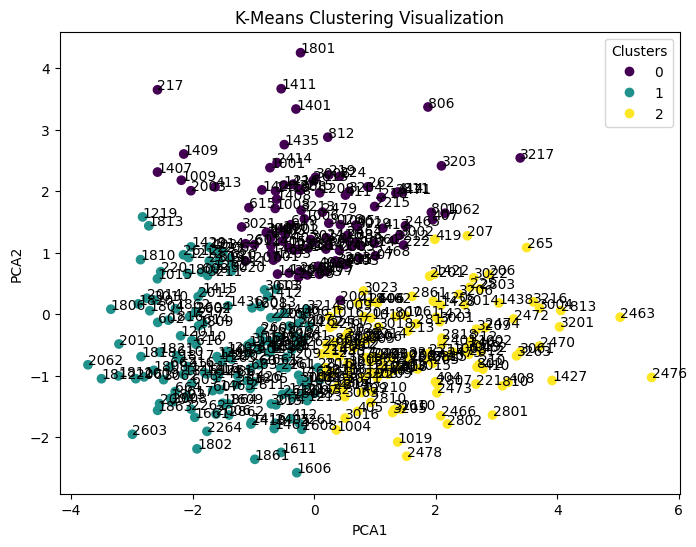

In [103]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
for index, row in pca_df.iterrows():
    plt.text(row['PCA1'], row['PCA2'], index)
plt.title('K-Means Clustering Visualization')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [92]:
clusters_check_df.query("powiat_numer == 2414")

,Y80-84,Y_GE85,Cluster,powiat_numer,name_normalized_tot
266,5337.078652,9641.638225,0,2414,bieruńsko-lędziński


In [111]:
pca.explained_variance_ratio_

array([0.14400882, 0.07715201])

[0.14400882 0.22116083 0.28849779 0.35342267 0.41427962 0.47064497
 0.52640926 0.57798643 0.62753624 0.67600416 0.72287562 0.76774866
 0.80865624 0.84553426 0.88175886 0.91703797 0.95152179 0.98043257
 0.99240637 0.99723602 1.        ]


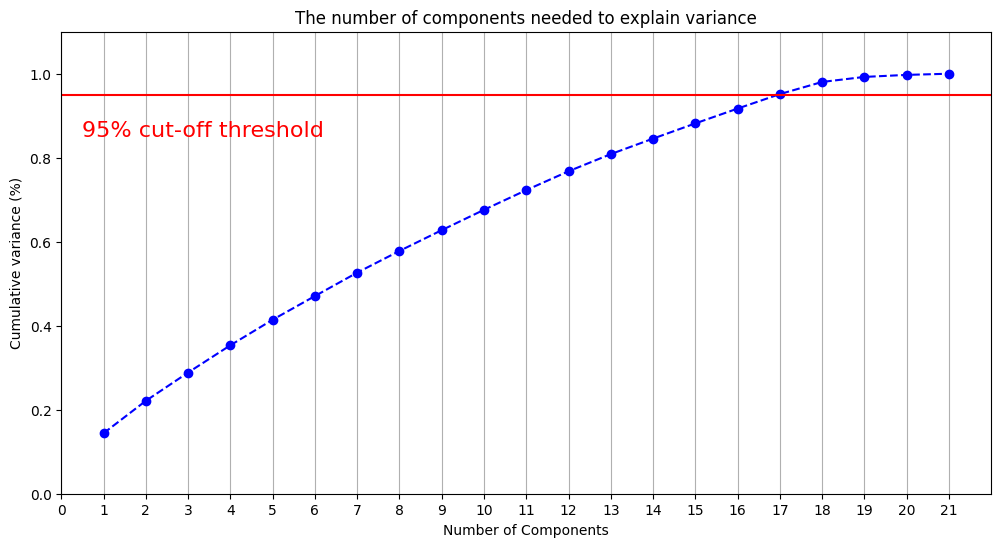

In [117]:
pca = PCA().fit(clustering_data)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [118]:
# Prepare the data for clustering
clustering_data = np.nan_to_num(clustering_data)  # Replace NaN values with 0

pca = PCA(n_components=17)
pca_components = pca.fit_transform(clustering_data)
# pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Determine the optimal number of clusters using the elbow method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     kmeans.fit(clustering_data)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# Perform k-means clustering (assuming 3 clusters based on the elbow method)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(pca_components)
cluster_labels = kmeans_pca.labels_

# Assign the cluster labels to the original dataframe
females_pivot['Cluster'] = cluster_labels
print(females_pivot)

/Users/nelatoma/Documents/icm/magisterka/zgony/MAGISTERKA_OFFICIAL/poviats_code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


age_group        Y10-14      Y15-19      Y20-24      Y25-29      Y30-34   
powiat_numer                                                              
201            0.000000    0.000000    0.000000    0.000000   29.533373  \
202           43.271311    0.000000    0.000000   33.244681    0.000000   
203           39.761431    0.000000   86.244071   77.549438   64.998375   
204            0.000000    0.000000    0.000000   80.710250    0.000000   
205            0.000000    0.000000    0.000000   66.445183   55.248619   
...                 ...         ...         ...         ...         ...   
3217          69.979006  157.853197   66.622252  108.283703   55.928412   
3218           0.000000    0.000000    0.000000    0.000000    0.000000   
3261           0.000000  246.913580   84.925690    0.000000   49.043649   
3262          11.050945    0.000000   43.459365   56.893609   52.680100   
3263           0.000000  134.048257  110.987791  171.086399  143.884892   

age_group         Y35-39

In [119]:
pca_components

array([[ 0.17886911, -0.86691216, -1.13255758, ...,  0.62149667,
         0.77384293,  0.17505225],
       [ 0.64060923, -0.55076959, -0.1573162 , ...,  0.69896582,
         0.92308747, -1.71351346],
       [ 0.53161816,  1.22455652,  2.29616356, ..., -1.00648291,
        -0.32314597,  0.86006315],
       ...,
       [-0.24254303, -1.77391613,  3.38202468, ...,  0.9843997 ,
         2.05553744,  0.43171406],
       [-0.2760978 , -0.51035376,  1.05992086, ...,  0.284511  ,
        -0.47533515,  0.53243876],
       [ 3.32918738, -0.67619091,  2.83941122, ..., -0.81920802,
        -0.98314484, -1.4514078 ]])

In [124]:
pca_df = pd.DataFrame(data=pca_components, columns = ["PCA" + str(i) for i in range(1, 18)])

In [126]:
pca_df['Cluster'] = cluster_labels

In [127]:
pca_df.index = females_pivot.index

In [145]:
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,Cluster
powiat_numer,,,,,,,,,,,,,,,,,,
201,0.178869,-0.866912,-1.132558,-0.058106,0.481382,-0.790755,0.352856,0.132611,0.167118,-0.396146,-0.663840,-0.216786,-0.418161,0.145008,0.621497,0.773843,0.175052,1
202,0.640609,-0.550770,-0.157316,-1.383996,-2.044445,0.349056,0.715491,1.205232,-0.229361,0.532555,0.331522,1.195532,-1.514691,-0.084271,0.698966,0.923087,-1.713513,0
203,0.531618,1.224557,2.296164,-0.278330,0.886645,-0.829035,-0.880441,-1.790787,-0.036381,0.982563,-0.813520,0.497537,-0.318156,-0.864830,-1.006483,-0.323146,0.860063,2
204,0.815774,-0.039771,-1.446735,-1.554341,1.070171,-0.800737,1.963753,2.164196,-1.056520,0.585266,-1.490231,0.946078,2.267484,-0.274264,0.053784,-0.047492,-1.126937,0
205,1.949372,-0.799534,-1.487727,-0.115434,-1.321898,0.656028,1.252284,0.097411,-0.177265,1.745404,-0.254730,-0.639919,1.903703,-1.825832,0.522427,0.426170,0.125751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,3.390015,2.538809,3.545867,0.795525,2.393894,2.632366,0.189455,0.127791,-1.952361,1.656097,-1.081466,-2.514501,-0.318524,-0.471384,-1.532833,0.661162,-0.123470,2
3218,0.571190,-0.827765,-1.013891,-0.845113,0.341925,1.336695,2.779549,0.921577,1.800778,0.927562,2.184394,-1.282462,-0.505865,-1.720126,-0.644894,-0.313351,0.373399,0
3261,-0.242543,-1.773916,3.382025,2.838693,0.677497,2.624454,1.284546,-1.546474,-0.619077,-1.196751,2.744515,-0.272094,0.174817,1.724563,0.984400,2.055537,0.431714,1


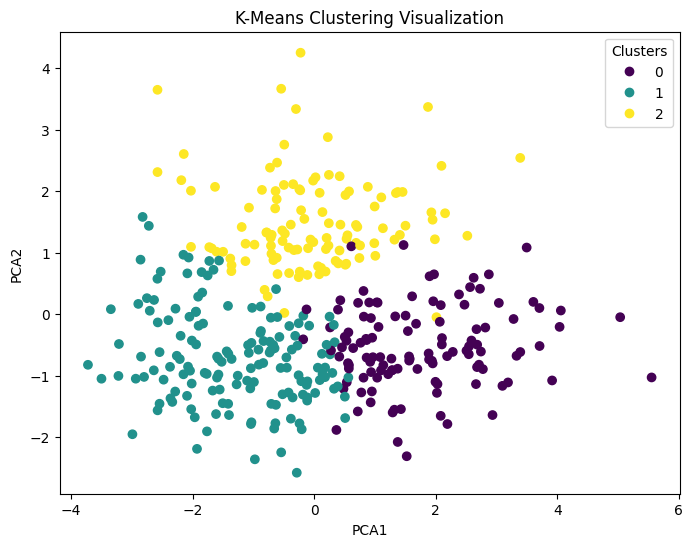

In [146]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
# for index, row in pca_df.iterrows():
#     plt.text(row['PCA1'], row['PCA2'], index)
plt.title('K-Means Clustering Visualization')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()